In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 데이터 가져오기

#### 가져올 데이터셋 : 캘리포니아 주택 가격(1990년 캘리포니아 인구조사 데이터 기반)

캘리포니아의 블록 그룹마다 인구, 중간 소득, 중간 주택 가격등을 담고 있으며 구역의 중간 주택 가격(median housing price)을 예측해야함.

median_house_value값, 레이블이 존재하므로 지도학습, 주택 가격을 예측해야하므로 회귀를 사용

In [6]:
housing = pd.read_csv("D:\Portfolio\hands on machine learning dataset\housing.csv")

In [7]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 2. 데이터 확인

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


1. 총 20640개의 데이터 샘플이 들어있으며 10개의 변수중 9개가 실수형 변수이다
2. 침실의 개수 변수의 null값은 207개이다.

In [9]:
# 특성 요약값 확인 
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


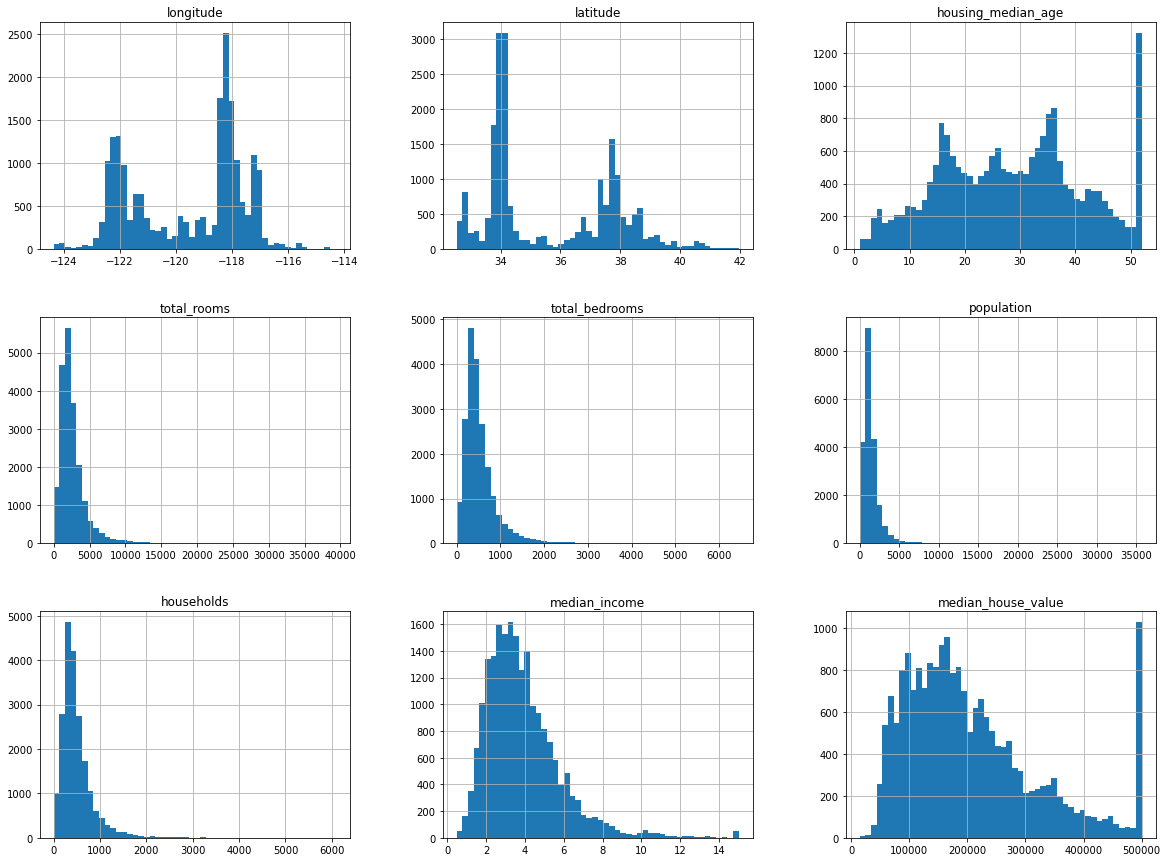

In [12]:
# 히스토그램 : 숫자형 특성에 대한 분포를 확인한다(분포가 치우쳐있는지, 어떤 모양을 띄는지) 
housing.hist(bins = 50, figsize = (20,15))
plt.show()

## 3. 테스트 세트 만들기

전체 데이터의 20%를 테스트 세트로 변환  -- 테스트 세트는 여러번 반복해도 동일한 테스트 세트가 생성되게끔 해야함.

만든 테스트 세트를 활용하여 분석하는것은 하면 안될 행동 - 테스트 세트에서 겉으로 드러난 어떤 패턴에 속아 머신러닝 모델을 만들게 될지도 모르기 때문 (**데이터 스누핑 편향**)

In [15]:
# 단순 무작위 추출
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, random_state = 42, test_size = 0.2)

데이터 자체가 크지 않은 경우 train_test_split을 사용하여 데이터를 분리하면 샘플링 편향이 생길 가능성이 높음.

이를 해결하기위해 **계층적 샘플링 방법(StratifiedShuffleSplit)**이 존재한다.
***
모집단을 비슷한 성질을 갖는 2개의 동질적인 층으로 구분하고, 각 층으로부터 단순 무작위 추출 방법을 적용하여 표본을 추출하는 방법

표본 크기가 크지않아도 대표성을 잘 보장한다는 장점이 있다(데이터 셋의 분포를 고르게 해준다)

ex) 남자 5000명 여자 100명인 집단에서 500명을 무작위 추출할 경우 여자가 뽑힐 확률이 매우 낮아진다.  -> 층화 비율을 정해 무작위 추출할 경우 남녀 비율을 유지하여 고르게 표본 추출이 가능해진다.
***

In [17]:
# 계층적 샘플링 방법
# 분리할 데이터 셋의 개수(n_splits)
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

In [86]:
# 중간 소득을 계층으로 사용하기위해 카테고리화
housing['income_cat'] = pd.cut(housing['median_income'], bins = [0.,1.5,3.0,4.5,6.,np.inf],
                              labels = [1,2,3,4,5])

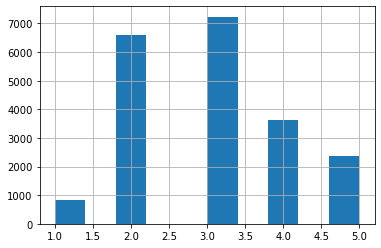

In [90]:
housing['income_cat'].hist()
plt.show()

In [87]:
# 소득 카테고리를 기반으로 계층 샘플링 진행
for train_idx, test_idx in split.split(housing, housing['income_cat']) :
    strat_train_set = housing.loc[train_idx]
    strat_test_set = housing.loc[test_idx]

In [94]:
# 전체 데이터셋과 계층 샘플링 추출 방법 소득 카테고리 비율 비교
print(strat_test_set['income_cat'].value_counts()/len(strat_test_set))
print(housing['income_cat'].value_counts()/len(housing))

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64


전제 데이터셋 비율과 비슷한 비율을 나타냈다.

In [97]:
# 전체 데이터 셋과 2가지 추출 방법 비율 비교
# 3가지 데이터의 소득 카테고리 비율 추출
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

# 무작위 추출
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# 데이터프레임 생성
# 1,2,3열 : 3가지 데이터 비율 정렬 , 4,5열 : 무작위 샘플링 오류율, 계층 샘플링 오류율 
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [98]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [99]:
# income_cat 변수 삭제
for set_ in (strat_train_set, strat_test_set) :
    set_.drop("income_cat",axis = 1, inplace = True)

## 4. 데이터 탐색

<Figure size 864x576 with 0 Axes>

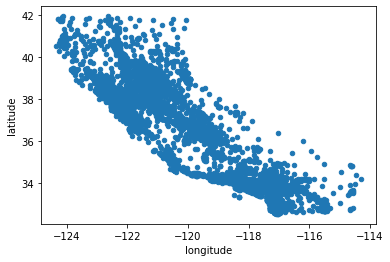

In [33]:
# 지리적 데이터 시각화
plt.figure(figsize = (12,8))
housing.plot(kind = 'scatter', x = "longitude",y = "latitude")
plt.show()

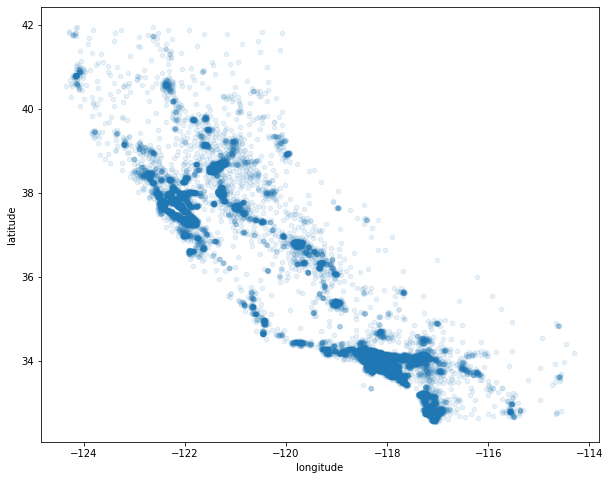

In [36]:
# 밀집된 영역을 더 잘 나타나게하기위해 투명도 조절
housing.plot(kind = 'scatter', x = "longitude",y = "latitude", alpha = 0.1, figsize = (10,8))
plt.show()

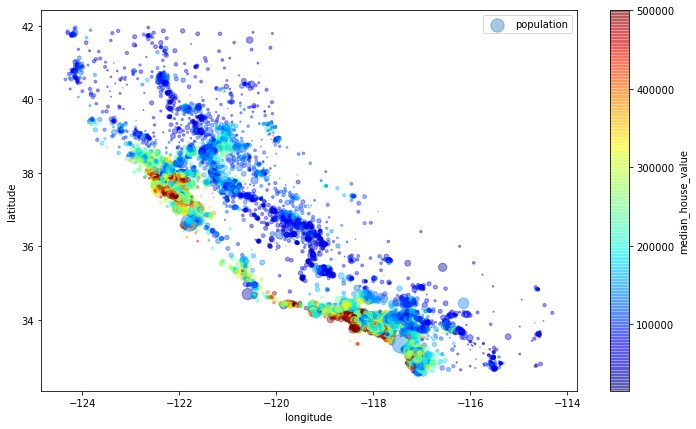

In [70]:
# 빨간색은 가격이 높은 지역, 파란색은 가격이 낮은 지역, 원이 큰곳은 인구가 많은 지역, 


housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, 
            s = housing['population']/100 , label = "population", figsize = (12,7),
            c = "median_house_value", cmap = plt.get_cmap('jet'), colorbar = True, sharex = False)

plt.legend()

주택 가격은 지역과 인구밀도에 따라 변화함을 보임. 특히 캘리포니아는 해안가와 인접한 곳의 주택 가격이 높게 나타남.

In [24]:
# 상관관계 확인

corr_house = housing.corr()

In [25]:
# y와 상관계수 정렬
# 중간소득 median_income과 양의 상관관계를 가짐
corr_house['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

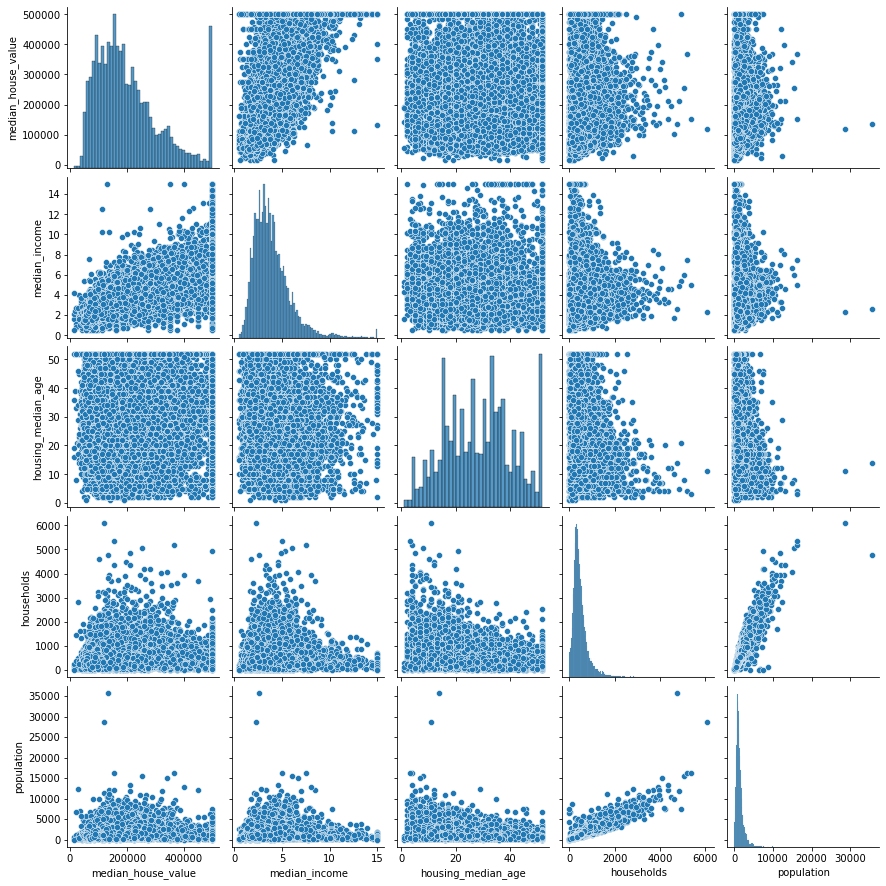

In [29]:
sns.pairplot(housing[['median_house_value','median_income','housing_median_age','households','population']])

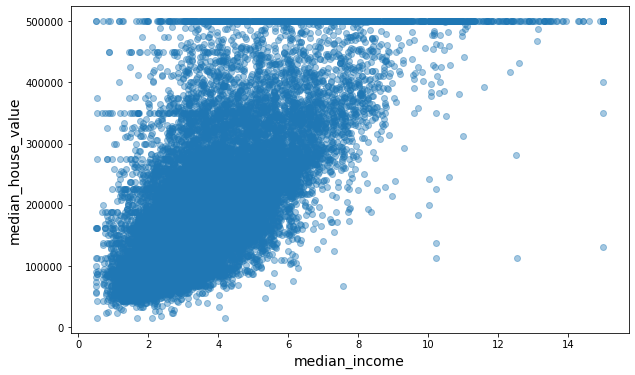

In [78]:
plt.figure(figsize = (10,6))
plt.scatter(housing['median_income'],housing['median_house_value'], alpha = 0.4)
plt.xlabel("median_income", fontsize = 14)
plt.ylabel("median_house_value", fontsize = 14)
plt.show()

시각화 해석

1. 양의 상관관계가 강하며 산점도 분포가 크게 펼쳐져 있지않음.

2. 중간 주택 가격이 500000$에서 데이터가 직선 그래프 형태를 보임.

## 5. 파생 변수 생성

지금까지의 과정을 통해 우리는 머신러닝 알고리즘 주입 이전에 데이터 전처리 과정을 수행했다.<br>
ex)데이터 형태 파악, 특성과 상관관계 파악, 테스트 세트 분리, 이상한 데이터들 파악 등


이제 머신러닝 알고리즘 주입 이전에 마지막으로 해볼 수 있는 것은 여러 특성의 조합을 시도해 보는 것이다.

***
1. 특정 구역의 방 개수(total_rooms)는 얼마나 많은 가구 수가 있는지 모른다면 그닥 유용하지 않다.<br>
-> 가구당 방 개수로 변환해본다.

2. 마찬가지로 전체 침실 개수도 그 자체로는 유용하지 않다.<br>
-> 방당 침실개수로 변환해본다.

3. 가구당 인원수도 흥미로운 조합이다. 조합해본다.
***

In [79]:
housing['total_rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [80]:
corr_house = housing.corr()
corr_house['median_house_value'].sort_values(ascending = False)

median_house_value           1.000000
median_income                0.688075
total_rooms_per_household    0.151948
total_rooms                  0.134153
housing_median_age           0.105623
households                   0.065843
total_bedrooms               0.049686
population_per_household    -0.023737
population                  -0.024650
longitude                   -0.045967
latitude                    -0.144160
bedrooms_per_room           -0.255880
Name: median_house_value, dtype: float64

가구당 방 개수가 그나마 약한 양의 상관관계를 띄며 침실과 방의 비율이 낮은 집이 비싼 경향(음의 상관계수가 강한 결과)을 보인다

## 6. 머신러닝 알고리즘을 위한 데이터 준비

- strat_train_set()함수를 사용하여 훈련 데이터 세트를 target변수가 제외된 데이터 세트와 target변수만 담긴 test 데이터 세트로 분리한다.

In [101]:
# train 데이터 레이블 제거
# drop은 데이터 복사본을 만들며 원자료에는 영향을 주지않음.
housing = strat_train_set.drop("median_house_value",axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

## 6-1. 데이터 정제

####  total_bedrooms의 null값 처리

***
1. 해당 구역을 제거<br>
- dropna() 사용

2. 전체 변수를 삭제<br>
- drop() 사용

3. 대체 값을 사용(0, 평균, 중앙값등)<br>
- fillna() 사용
***

In [104]:
# 중앙값으로 null값 채우기
null_median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(null_median, inplace = True)

##  6-2. 범주형 변수(ocean_proximity) 처리

범주형 변수를 숫자형으로 변환해주는 작업이 필요할때가 많다.

이러한 경우 사용하는 것이 **one-hot-encoding(원핫인코딩)** 방법이다.

In [106]:
# 범주형 데이터
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [107]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot
# 출력 결과는 scipy 희소 행렬로 나온다.

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [108]:
# 넘파이 배열로 변혼
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

## 6-3 특성 스케일링

머신러닝 알고리즘은 숫자형 특성들의 스케일이 많이 다르면 잘 작동하지 않는다.

스케일이 많이 다른 경우, 모든 특성들의 범위를 같도록 만들어줘야 하는데, min-max 스케일링과 표준화(standardization)가 널리 사용된다

### 변환 파이프라인

앞서 진행한 변환 작업들은 정확한 순서대로 실행해야 한다. 하지만 변환 단계가 많을 경우 복잡함을 줄이기 위해 연속된 변환들을 순서대로 처리하는 **Pipeline**클래스를 제공한다.

In [115]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)


In [116]:
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

In [117]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# SimpleImputer : null값을 특정값으로 대체시 대체값만 계산될수 있기때문에 텍스트 특성을 제거
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer),
    ('attribs_adder',CombinedAttributesAdder(),
    ('std_scaler', StandardScaler()))
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

ValueError: too many values to unpack (expected 2)